In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
import pandas as pd
import numpy as np


def remove_curency(string):
    return string[1:]


def fix_data(file_path, percentage, months: list):
    # Columns to keep
    columns_to_keep = ['id', 'zipcode', 'transit', 'bedrooms', 'beds', 'review_scores_rating',
                       'number_of_reviews', 'neighbourhood_cleansed', 'name', 'latitude', 'longitude',
                       'last_review', 'instant_bookable', 'host_since', 'host_response_rate',
                       'host_identity_verified', 'host_has_profile_pic', 'first_review',
                       'description', 'city', 'cancellation_policy', 'bed_type', 'bathrooms',
                       'accommodates', 'room_type', 'property_type', 'price','amenities',
                       'availability_365', 'minimum_nights','host_id','host_listings_count']#columns to keep

    combined_df = []  # To store the data
    reviews = []
    for month in months:
        new_file_path = file_path + month + "/listings.csv"
        df = pd.read_csv(new_file_path)

        num_rows_to_keep = int(len(df) * percentage)
        df = df.sample(n=num_rows_to_keep)#sample the rows

        for column in df.columns:
            if column not in columns_to_keep or len(df[column].unique()) == 1:#ama exei mono ena value h an den einai stis columns to keep
                df = df.drop(column, axis=1)#drop it
        df = df.dropna() #drop nan values

        df['month'] = month[1:]
        df['price'] = df['price'].apply(remove_curency).replace(",",'',regex=True)#remove curency from prices and remove ',' (for values like 1,200 = 1200) so i can use it as numbers and no strings

        combined_df.append(df)#append the df to the list

        #Process reviews.csv for each month
        reviews_file_path = file_path + month + "/reviews.csv"
        reviews_df = pd.read_csv(reviews_file_path, usecols=['listing_id', 'date', 'comments'])
        reviews.append(reviews_df)

    #concat the dataframes
    df = pd.concat(combined_df)
    reviews_df = pd.concat(reviews)

    if "2019" in file_path:
        df.to_csv("train_2019.csv", index=False)
        reviews_df.to_csv("reviews_grouped2019.csv", index=False)
    else:
        df.to_csv("train_2023.csv", index=False)
        reviews_df.to_csv("reviews_grouped2023.csv", index=False)


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import folium

def rounding(number):
    return round(number,2)


def erotima1_1(df,year):
    #1.1
    result_table = df['room_type'].value_counts() #metrao tis monadikes times

    sorted_table = result_table.sort_values(ascending=False) #tis sortaro (apo megalitero se mikrotero)

    plt.bar(sorted_table.index,sorted_table.values)
    plt.xlabel("Categories")
    plt.ylabel("Quantity")
    plt.title(f"(1.1)Proportionate room type appearances for {year}") #Αναλογια εμφανισεις τυπου δωματιου
    plt.show()

    return sorted_table.index[0],sorted_table.values[0] #epistrefo to room_type me thn megaliteri emfanisi

def erotima1_2(df,year):
    # erwtisi 1.2
    prices = df.groupby('month')['price'].mean() #metrao ton meso oro ton timon gia kathe mina

    plt.plot(prices.index, prices.values)
    plt.xlabel('Month')
    plt.ylabel('Average Price')
    plt.title(f'(1.2)Average Price Trend for {year}')
    plt.show()

    return prices

def erotima1_3(df, year, n=5):
    #erotisi 1.3
    neighborhoods = df.groupby('neighbourhood_cleansed')['number_of_reviews'].sum()

    neighborhoods_bars = neighborhoods.nlargest(2*n) #kratao kapia statistika gia to grafima

    plt.bar(neighborhoods_bars.index,neighborhoods_bars.values)
    plt.xticks(neighborhoods_bars.index,rotation='vertical')
    plt.xlabel('Neighbourhoods')
    plt.ylabel('Reviews')
    plt.title(f'(1.3)Reviews per neighbourhood for {year} (10 best)')
    plt.show()

    return neighborhoods_bars.nlargest(n) #epistrefo tis akribes times gia tis 5 most_reviewd geitonies

def erotima1_4(df):
    # Calculate the count of listings per neighborhood
    neighborhood_counts = df['neighbourhood_cleansed'].value_counts()

    # Get the neighborhood with the most listings
    neighborhood_with_most_listings = neighborhood_counts.idxmax()



    # Plotting the neighborhood counts
    plt.figure(figsize=(10, 6))
    plt.bar(neighborhood_counts.index,neighborhood_counts.values)
    plt.xticks(neighborhood_counts.index,rotation='vertical')
    plt.xlabel('Neighborhood')
    plt.ylabel('Number of Listings')
    plt.title('Neighborhoods with Most Listings (1.4)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return neighborhood_with_most_listings

#1.5
def erotima1_5(df):
    df.groupby(['month', 'neighbourhood_cleansed']).size().unstack().plot(kind='bar', figsize=(12, 8))
    plt.xlabel('Month')
    plt.ylabel('Number of Listings')
    plt.title('Listings per Neighborhood per Month (1.5)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#1.6
def erotima1_6(df):
    plt.figure(figsize=(10, 6))
    df['neighbourhood_cleansed'].value_counts().plot(kind='bar')
    plt.xlabel('Neighborhood')
    plt.ylabel('Count')
    plt.title('Neighborhood Histogram')
    plt.xticks(rotation='vertical')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#1.7
def erotima1_7(df):
    most_common_room_type_per_neighborhood = df.groupby('neighbourhood_cleansed')['room_type'].apply(lambda x: x.mode()[0])
    return most_common_room_type_per_neighborhood

#1.8
def erotima1_8(df):
    most_expensive_room_type = df.groupby('room_type')['price'].mean().idxmax()
    plt.figure(figsize=(10, 6))
    df.groupby('room_type')['price'].mean().plot(kind='bar')
    plt.xlabel('Room Type')
    plt.ylabel('Average Price')
    plt.title('Most Expensive Room Type (1.8)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    return most_expensive_room_type

#1.9
def erotima1_9(df, selected_month, info_to_display):

    # Βεβαιωθείτε ότι τα ονόματα στηλών είναι σωστά
    if not isinstance(info_to_display, list):
        info_to_display = [info_to_display]

    # Φιλτράρισμα για δεδομένα που αντιστοιχούν στον συγκεκριμένο μήνα
    df_filtered = df[df['month'] == selected_month]

    # Έλεγχος αν το df_filtered είναι άδειο
    if df_filtered.empty:
        raise ValueError(f"No data found for the month '{selected_month}'.")

    # Έλεγχος για την ύπαρξη των στήλων στη λίστα 'info_to_display'
    missing_columns = [info for info in info_to_display if info not in df_filtered.columns]
    if missing_columns:
        raise KeyError(f"The following columns are missing: {missing_columns}")

    # Δημιουργία αρχικής τοποθεσίας για το χάρτη
    initial_location = [df_filtered['latitude'].iloc[0], df_filtered['longitude'].iloc[0]]
    folium_map = folium.Map(location=initial_location, zoom_start=12)

    # Προσθήκη δεικτών για κάθε ακίνητο
    for _, row in df_filtered.iterrows():
        popup_text = "<br>".join([f"{info}: {row[info]}" for info in info_to_display])
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=folium.Popup(popup_text, max_width=300)
        ).add_to(folium_map)

    folium_map.save("my_map.html")
    return folium_map

#1.10
def erotima1_10(df,reviews,string:int):
    def show_wordclound(wordcloud):
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud')
        plt.show()

    # Combine all the text from the specified columns
    text = ' '.join(df['neighbourhood_cleansed'].dropna().astype(str).tolist())
    text3 = ' '.join(df['description'].dropna().astype(str).tolist())
    text4 = ' '.join(reviews["comments"].dropna().astype(str).tolist())

    # Create a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    wordcloud3 = WordCloud(width=800, height=400, background_color='white').generate(text3)
    wordcloud4 = WordCloud(width=800, height=400, background_color='white').generate(text4)
    # Display the word cloud
    show_wordclound(wordcloud)
    show_wordclound(wordcloud3)
    show_wordclound(wordcloud4)

    if 2019 == string:
        text2 = ' '.join(df['transit'].dropna().astype(str).tolist())
        wordcloud2 = WordCloud(width=800, height=400, background_color='white').generate(text2)
        show_wordclound(wordcloud2)

def erotima1_12(df,year):
    #1.12

    def group_by_value(Neighborhoods_MeanPrices,mean,e)->dict:
        #taksinomo tis times sumfona me thn apoklisi pou exoun me thn diakimansi apo to MO
        cheap_values = []
        midium_values = []
        expensive_values = []

        for neighborhood,value in Neighborhoods_MeanPrices:
            if value < mean - e:
                cheap_values.append(neighborhood)
            elif value > mean + e:
                expensive_values.append(neighborhood)
            else:
                midium_values.append(neighborhood)

        catigories = {}
        catigories = {'Cheap':cheap_values,'Midium':midium_values,'Expensive':expensive_values}
        return catigories

    only_2_accommodates = df[df.accommodates == 2] #kratao mono ta domatia me xoritikotia 2
    average_price_per_neighborhood = only_2_accommodates.groupby('neighbourhood_cleansed')['price'].mean().apply(rounding) #grouparo ana geitonia kai brisko mesi timh
    sorted_average_price_per_neighborhood = average_price_per_neighborhood.sort_values(ascending=False) #tajinomisi ton timon se auksousa seira

    plt.bar(sorted_average_price_per_neighborhood.index,sorted_average_price_per_neighborhood.values)
    plt.xticks(sorted_average_price_per_neighborhood.index,rotation='vertical')
    plt.xlabel('Neighbourhood')
    plt.ylabel('Average Values')
    plt.title(f'(1.12)Average values for Neighbourhood with only 2 accommodates for {year}')
    plt.show()

    overall_ave = average_price_per_neighborhood.values.mean() #brisko ton MO ton MO
    overall_ave = rounding(overall_ave)

    var = ((average_price_per_neighborhood.values - overall_ave) ** 2).sum() / (len(average_price_per_neighborhood) - 1) #vrisko thn diakimansi ton meson oron ton timon

    e = np.sqrt(var) #perno thn rizo tou prokeimenoy na oriso sosthn apostasi (e = tipiki diakimansi) gia ton diaxorizmo ton timon
    e = rounding(e)

    comb = list(zip(list(sorted_average_price_per_neighborhood.index),list(sorted_average_price_per_neighborhood.values)))
    grouped_values = group_by_value(comb,overall_ave,e)

    return grouped_values

#1.13
#μέση βαθμολογία κριτικών ανά αριθμό κρεβατιών
def erotima1_13_1(df):
    # Ομαδοποίηση κατά αριθμό κρεβατιών
    gay=df[['beds','review_scores_rating']]
    gay=gay[gay.beds>0]
    avg_review_score_per_bed = gay.groupby('beds')['review_scores_rating'].mean()

    plt.figure(figsize=(10, 6))
    avg_review_score_per_bed.plot(kind='bar', color='orange')
    plt.xlabel('Number of Beds')
    plt.ylabel('Average Review Score')
    plt.title('Average Review Score per Number of Beds')
    plt.show()

#bar chart for average availability across neighborhoods
def erotima1_13_2(df):
    #Μέση διαθεσιμότητα ανά γειτονιά
    avg_availability_per_neighborhood = df.groupby('neighbourhood_cleansed')['availability_365'].mean()

    plt.figure(figsize=(12, 6))
    avg_availability_per_neighborhood.plot(kind='bar', color='skyblue')
    plt.xlabel('Neighborhood')
    plt.ylabel('Average Availability (365 days)')
    plt.title('Average Availability per Neighborhood')
    plt.show()

#bar chart for average price across different property types
def erotima1_13_3(df):
    # Καθαρισμός των τιμών για να είναι αριθμητικές
    df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

    #μέση τιμή ανά τύπο ακίνητου
    avg_price_per_property_type = df.groupby('property_type')['price'].mean()

    plt.figure(figsize=(12, 6))
    avg_price_per_property_type.plot(kind='bar', color='lightcoral')
    plt.xlabel('Property Type')
    plt.ylabel('Average Price')
    plt.title('Average Price per Property Type')
    plt.show()

def erotima1_14(df,n=10):
    #1.14

    #kratao mono tis 2 steiles poy xriazome,sortaro tis times simfona me to (host_listings_count),petao olla ta diplotipa ektos apo to 1o pou brisko(to host_id me to megalitero host_listings_count)
    only_nesesery_colums = df[['host_id','host_listings_count']].sort_values(by='host_listings_count',ascending=False).drop_duplicates(subset=['host_id'],keep='first')
    only_nesesery_colums = only_nesesery_colums[only_nesesery_colums.host_listings_count >= 3] #kratao tis grammes me to (host_listings_count) pano apo 2

    return only_nesesery_colums.nlargest(n,'host_listings_count')

def compare_airbnb_years(df_year1, df_year2):
    # 1. Αλλαγές στις γειτονιές
    neighborhoods_year1 = df_year1['neighbourhood_cleansed'].nunique()
    neighborhoods_year2 = df_year2['neighbourhood_cleansed'].nunique()
    print(f"Number of unique neighborhoods in Year 1: {neighborhoods_year1}")
    print(f"Number of unique neighborhoods in Year 2: {neighborhoods_year2}")

    # 2. Αύξηση των τιμών
    avg_price_year1 = df_year1['price'].mean()
    avg_price_year2 = df_year2['price'].mean()
    print(f"Average price in Year 1: {avg_price_year1}")
    print(f"Average price in Year 2: {avg_price_year2}")

    # 3. Διατήρηση ακριβών γειτονιών
    expensive_neighborhoods_year1 = df_year1[df_year1['price'] > avg_price_year1]['neighbourhood_cleansed'].nunique()
    expensive_neighborhoods_year2 = df_year2[df_year2['price'] > avg_price_year2]['neighbourhood_cleansed'].nunique()
    print(f"Number of expensive neighborhoods in Year 1 that remained expensive in Year 2: {expensive_neighborhoods_year1}")
    print(f"Number of expensive neighborhoods in Year 2: {expensive_neighborhoods_year2}")

def erotima1_11(df):
    #1.11

    def grouping_and_remove(string):
        list_values = list(string.split(',')) # Split the string into a list separating by ','
        list_values = [value for value in list_values if "translation missing" not in value] # Remove values containing "translation missing"
        return list(set(list_values)) # Remove duplicates from the list and return it as a list

    # Define replacement dictionaries
    replacement_dicts = [
        ('Kitchen', {'Oven', 'Stove', '"Cooking basics"', '"Coffee maker"', '"Dishes and silverware"',
                     'Refrigerator', '"BBQ grill"', '"Breakfast table"', '"Espresso machine"', '"Full kitchen"',
                     '"Gas oven"', '"Hot water kettle"', 'Microwave','"Heat lamps"','"Steam oven"','"Warming drawer"',
                     'Kitchenette'}),

        ('Family Friendly', {'"Convection oven"', '"Day bed"', '"Double oven"', '"Family/kid friendly"', '"Garden or backyard"',
                             'Terrace','"Murphy bed"','"Table corner guards"'}),

        ('Appliances', {'Washer', 'Dryer', 'Heating', '"Hair dryer"', 'TV', 'Iron', '"Air conditioning"',
                        '"Cable Appliances"', '"Ceiling fan"', '"Mini fridge"', 'Printer','Dishwasher','Freezer'}),

        ('Services', {'"24-hour check-in"', '"Buzzer/wireless intercom"', '"Cleaning before checkout"', '"Host greets you"',
                      '"Long term stays allowed"', '"Luggage dropoff allowed"',
                      '"Self check-in"', '"Smoking allowed"', '"Suitable for events"', 'Breakfast'}),

        ('Accesibility', {'"Accessible-height toilet"', '"Accessible-height bed"', '"Disabled parking spot"',
                          '"Electric profiling bed"', '"Flat path to front door"', '"Private entrance"', '"Shower chair"',
                          '"Step-free access"', 'Elevator','"Ground floor access"','"Well-lit path to entrance"',
                          '"Wheelchair accessible"'}),

        ('Facilities', {'"Bed linens"', '"Changing table"', '"Extra pillows and blankets"','"Private living room"',
                        '"Central air conditioning"', '"Heated floors"', '"Hot water"', '"Firm mattress"',
                        '"Room-darkening shades"', '"Shared gym"'}),

        ('Kids Friendly', {'"Baby bath"', '"Baby monitor"', '"Babysitter recommendations"', '"Children’s books and toys"',
                            '"Children’s dinnerware"', '"Pack ’n Play/travel crib"', 'Crib'}),

        ('Bath Luxury', {'"Bathtub with bath chair"', '"Fixed grab bars for shower"', '"Fixed grab bars forBathroom',
                          '"Heated towel rack"', '"Hot tub"', '"Soaking tub"','"Fixed grab bars forBathroom"','"Jetted tub"','"Private hot tub"',
                         '"Stand alone steam shower"','Bidet'}),

        ('Bathroom', {' toilet"', '"Bath towel"', '"Bathroom essentials"', '"Body soap"', '"Handheld shower head"',
                        '"Rain shower"', '"Roll-in shower"', 'Shampoo',' "Bathtub"]','"Toilet paper"','"Touchless faucets"','"Walk-in shower"',
                      'Bathtub'}),

        ('Security', {'"Carbon monoxide detector"', '"Fire extinguisher"', '"Fire pit"', '"Fireplace guards"', '"First aid kit"',
                        '"Lock on bedroom door"', '"Safety card"', '"Smart lock"', '"Smoke detector"', '"Stair gates"',
                        '"Window guards"','Doorman','Lockbox'}),

        ('Premium', {'"Alfresco bathtub"', '"Bedroom comforts"', '"Amazon Echo"', '"DVD player"', '"En suite bathroom"',
                      '"Appliancesing Board"', '"Exercise equipment"', '"Formal dining area"', '"Game console"',
                      '"High-resolution computer monitor"', '"Indoor fireplace"', '"Memory foam mattress"', '"Pillow-top mattress"',
                      '"Projector and screen"', '"Smart Appliances"', '"Sound system"','"Private pool"','"Wine cooler"','Sauna','Gym',
                     '"HBO GO"','Netflix'}),

        ('Pets Friendly', {'"Other pet(s)"', '"Pets allowed"', '"Pets live on this property"', 'Cat(s)', 'Dog(s)'}),

        ('Parking', {'"Free parking on premises"', '"Free street parking"', '"Outdoor parking"', '"Paid parking off premises"',
                      '"Paid parking on premises"','"EV charger"'}),

        ('Natura View',{'"Beach view"','"Lake access"','"Mountain view"','Beachfront','Waterfront','Ski-in/Ski-out'}),

        ('Outdoor',{'"Outdoor seating"','"Patio or balcony"','"Sun loungers"','Balcony','Hammock','Pool','"Outlet covers"'}),

        ('Other',{'"Beach essentials"','"Building staff"','"Cable Appliances"','Hangers','Mudroom','"Standing valet"'}),

        ('Work Friendly',{'"Pocket wifi"','"Fax machine"','"High chair"','Wifi','Internet','Keypad','"Single level home"','"Laptop friendly workspace"','"Ethernet connection"'}),

        ('Comfort',{'"Wide clearance to bed"','"Wide clearance to shower','"Wide doorway"','"Wide entryway"','"Wide hallway clearance"'})
    ]

    amenities = df['amenities']
    remove_bracket = {'{': '', '}': ''}

    # Apply replacements using a for loop
    for label, replacements in replacement_dicts:
        for value in replacements:
            amenities = amenities.str.replace(value, label)

    # Remove brackets
    amenities = amenities.replace(remove_bracket, regex=True)

    # Apply grouping and remove function
    amenities = amenities.apply(grouping_and_remove)

    # Extract distinct values
    distinct_values = set()
    for i in amenities:
        for j in i:
            distinct_values.add(j)



    amenities = amenities.explode().value_counts()

    plt.bar(amenities.index,amenities.values)
    plt.xticks(amenities.index,rotation='vertical')
    plt.xlabel("Categories")
    plt.ylabel("Quantity")
    plt.title(f"(1.11)Ksexoristes times") #Αναλογια εμφανισεις τυπου δωματιου
    plt.show()

    return distinct_values


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

def create_wordcloud_ex2(df):

    # 2.1
    # Combine all the text from the specified columns
    text3 = ' '.join(df['description'].dropna().astype(str).tolist())


    noHTMLword = []
    HTMLwords = ["<br","/><b>","/>","</b>","-"]

    # Remove stop words and HTML words
    for word in text3.split():
        for character in HTMLwords:
            if character in word.lower():
                word = word.replace(character,"")
        if word.lower() not in ENGLISH_STOP_WORDS:
            noHTMLword.append(word)

    text = ' '.join(noHTMLword)

    # 2.5
    # Tokenize the text
    athens_tokens = text.split()

    # Count the frequency of each word
    word_frequency = {}
    for word in athens_tokens:
        if word in word_frequency:
            word_frequency[word] += 1
        else:
            word_frequency[word] = 1

    # Sort the words based on their frequency in descending order
    sorted_words = sorted(word_frequency.items(), key=lambda x: x[1], reverse=True)

    # Print the top 10 most frequent words in Athens properties
    print("Top 10 most frequent words in Athens properties:")
    for word, frequency in sorted_words[:10]:
        print(f"{word}: {frequency}")


    # Concatenate name and description columns
    df['name_description'] = df['name'].fillna('NULL') + ' ' + df['description'].fillna('NULL')


    # Remove duplicates
    df.drop_duplicates(subset='name_description', inplace=True)
    # Create TF-IDF matrix
    vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
    tfidf_matrix = vectorizer.fit_transform(df['name_description'])

    # 2.2
    # Calculate cosine similarity for each property with all others
    similarity_matrix = cosine_similarity(tfidf_matrix)
    # Create a dictionary to store the top 100 similar properties
    similar_properties = {}
    # Iterate over each property
    for i in range(len(similarity_matrix)):
        # Get the similarity scores for the current property
        similarity_scores = similarity_matrix[i]

        # Sort the similarity scores in descending order and get the indices of the top 100 similar properties
        top_similar_indices = np.argsort(similarity_scores)[::-1][:101]

        # Exclude the current property itself from the top similar indices
        top_similar_indices = top_similar_indices[top_similar_indices != i]

        # top_similar_indices = np.round(top_similar_indices, 5)

        # Store the top similar properties in the dictionary
        similar_properties[i] = top_similar_indices


    # 2.3
    def recommend(item_id, num):
        # Get the index of the item_id
        item_index = item_id

        # Get the similar indices for the item_id
        similar_indices = similar_properties[item_index][:num]

        print(f"Recommending {num} listings similar to {df.iloc[item_index]['name']}")
        print("---------------------------------------------------------")

        # Iterate over the similar indices and print the recommended listings
        for similar_index in similar_indices:
            name = df.iloc[similar_index]['name']
            description = df.iloc[similar_index]['description']
            similarity_score = similarity_matrix[item_index][similar_index]

            print(f"Recommended: {name}")
            print(f"Description: {description}")
            print(f"(score: {similarity_score})")
            print()
    # Choose a random item_id from the dictionary of similar properties
    random_item_id = np.random.choice(range(0,len(similar_properties)))

    # Call the recommend function with the random item_id and number of recommendations
    recommend(random_item_id, 5)

    #2.4

    # Tokenize the text
    tokens = text.split()

    # Create a BigramCollocationFinder
    finder = BigramCollocationFinder.from_words(tokens)

    # Find the top 10 collocations based on their frequency
    collocations = finder.nbest(BigramAssocMeasures.raw_freq, 10)

    # Print the collocations
    print("Top 10 collocations:")
    for collocation in collocations:
        print(collocation)
    print(len(similar_properties))

In [ ]:
import pandas as pd

file_path_2019 = "/content/gdrive/MyDrive/data/2019"
file_path_2023 = "/content/gdrive/MyDrive/data/2023"

months_2019 = ["/april","/febrouary","/march"]
months_2023 = ["/june","/march","/september"]

fix_data(file_path_2019, 0.5, months_2019)
fix_data(file_path_2023, 0.5, months_2023)

train_2019 = pd.read_csv('/content/train_2019.csv')
train_2023 = pd.read_csv('/content/train_2023.csv')

reviews_2019 = pd.read_csv('/content/reviews_grouped2019.csv')
reviews_2023 = pd.read_csv('/content/reviews_grouped2023.csv')

<ipython-input-3-bdb6ef1a8dc9>:23: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(new_file_path)
<ipython-input-3-bdb6ef1a8dc9>:23: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(new_file_path)
<ipython-input-3-bdb6ef1a8dc9>:23: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(new_file_path)
<ipython-input-6-52fd13c2a8a0>:16: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_2023 = pd.read_csv('/content/reviews_grouped2023.csv')


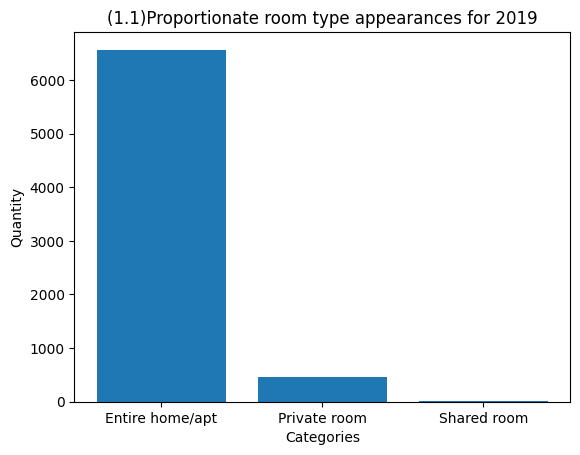

('Entire home/apt', 6565)


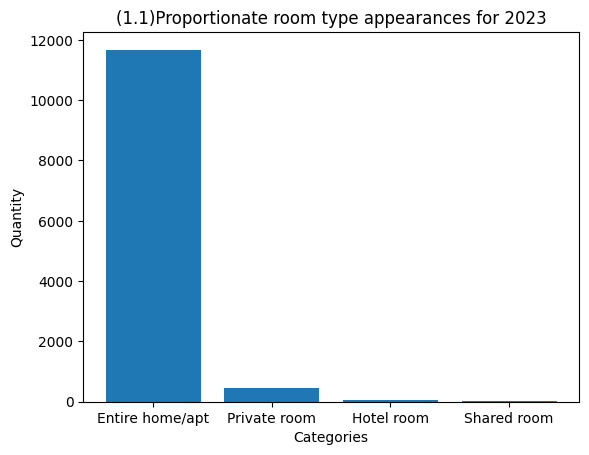

('Entire home/apt', 11673)


In [ ]:
#test 1.1
print(erotima1_1(train_2019,2019))
print(erotima1_1(train_2023,2023))

In [ ]:
# #test 1.2
print(erotima1_2(train_2019,2019))
print(erotima1_2(train_2023,2023))

In [ ]:
# #test 1.3
print(erotima1_3(train_2019,2019))
print(erotima1_3(train_2023,2023))

In [ ]:
# #test 1.4
print(erotima1_4(train_2019))
print(erotima1_4(train_2023))

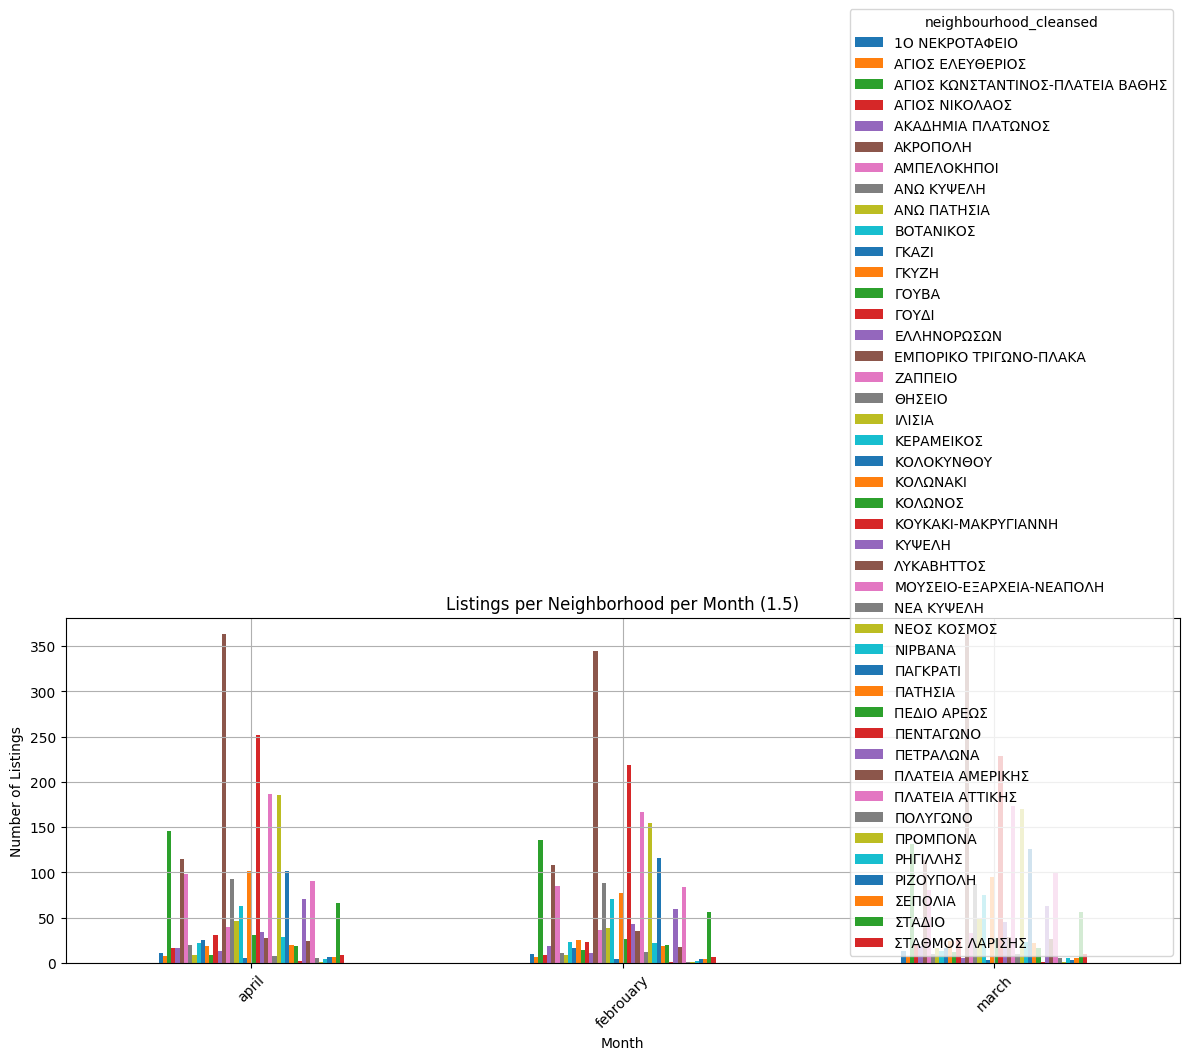

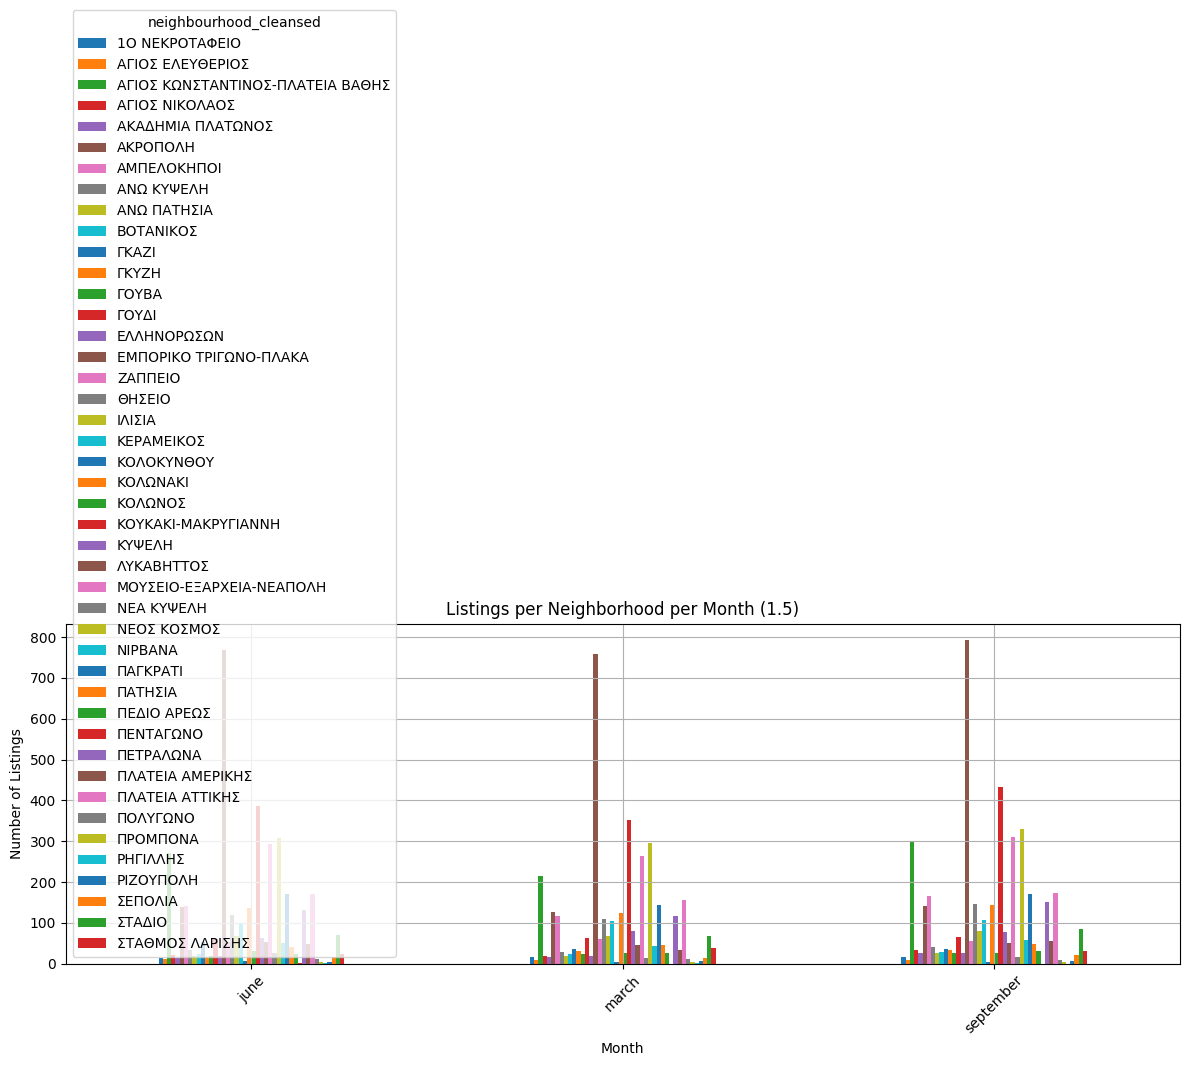

In [ ]:
# #test 1.5
erotima1_5(train_2019)
erotima1_5(train_2023)

In [ ]:
# #test 1.6
erotima1_6(train_2019)
erotima1_6(train_2023)

In [ ]:
# #test 1.7
print(erotima1_7(train_2019))
print(erotima1_7(train_2023))

neighbourhood_cleansed
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                      Entire home/apt
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                    Entire home/apt
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ    Entire home/apt
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ                      Entire home/apt
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ                   Entire home/apt
ΑΚΡΟΠΟΛΗ                            Entire home/apt
ΑΜΠΕΛΟΚΗΠΟΙ                         Entire home/apt
ΑΝΩ ΚΥΨΕΛΗ                          Entire home/apt
ΑΝΩ ΠΑΤΗΣΙΑ                         Entire home/apt
ΒΟΤΑΝΙΚΟΣ                           Entire home/apt
ΓΚΑΖΙ                               Entire home/apt
ΓΚΥΖΗ                               Entire home/apt
ΓΟΥΒΑ                               Entire home/apt
ΓΟΥΔΙ                               Entire home/apt
ΕΛΛΗΝΟΡΩΣΩΝ                         Entire home/apt
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              Entire home/apt
ΖΑΠΠΕΙΟ                             Entire home/apt
ΘΗΣΕΙΟ                              Entire home/apt
ΙΛΙΣΙΑ                              Entir

In [ ]:
# #test 1.8
print(erotima1_8(train_2019))
print(erotima1_8(train_2023))

In [ ]:
# #test 1.9
print(erotima1_9(train_2019,"april","room_type"))

In [ ]:
# test 1.10
#erotima1_10(train_2019,reviews_2019,2019)
erotima1_10(train_2023,reviews_2023,2023)

In [ ]:
# #test 1.11
erotima1_11(train_2019)

In [ ]:
# #test 1.12
print(erotima1_12(train_2019,2019))
print(erotima1_12(train_2023,2023))

In [ ]:
#test 1.13
#2019
erotima1_13_1(train_2019)
erotima1_13_2(train_2019)
erotima1_13_3(train_2019)
#2023
erotima1_13_1(train_2023)
erotima1_13_2(train_2023)
erotima1_13_3(train_2023)

In [ ]:
#test 1.14
print(f'For 2019\n{erotima1_14(train_2019)}')
print(f'\nFor 2023\n{erotima1_14(train_2023)}')

In [ ]:
#test 1.15
compare_airbnb_years(train_2019,train_2023)

In [ ]:
#test 2 meros
create_wordcloud_ex2(train_2019)
create_wordcloud_ex2(train_2023)

Top 10 most frequent words in Athens properties:
apartment: 11005
Athens: 4591
fully: 4163
room: 4068
located: 3976
living: 3909
metro: 3841
Acropolis: 3835
equipped: 3622
bed: 3580
Recommending 5 listings similar to Fine stay in Kolonaki
---------------------------------------------------------
Recommended: Apartment in the heart of Kolonaki
Description: 80 sqm apartment with a beautiful view, lots of warm sunlight and excellent energy in the heart of Athens. Kolonaki is one of the best and most vibrant areas of Athens and you can walk almost everywhere. The apartment is on the 3rd floor and has a unique view of Aghios Dionysios church with no buildings in front.  It is a cosy and very bright apartment with a warm and pleasant feeling.  It consists of a main living room, dining area, two bedrooms, a kitchen, a bathroom and a second WC. We love recommending places to eat and give you advice on how to get around the city. We can also help you in programming the rest of your holidays in 